In [8]:
import sys
sys.path.append("../")

import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pytorch_resnet.resnet import resnet32,resnet44,resnet20
from utils import evaluate,cifar10_loader
from grid_search import load_resnet

# Pretrained vs Quantized

In [2]:
fp = lambda name:f"../pytorch_resnet/pretrained_models/{name}.th"
trainloader,testloader = cifar10_loader(256,"../../data")

In [ ]:
# model_names = ["resnet20","resnet32","resnet44"]
# models = [resnet20,resnet32,resnet44]

# pretrained_accuracy = {}

# for model_name,model_fn in zip(model_names,models):
#     model = model_fn()
#     model.load_state_dict(load_resnet(fp(model_name)))
#     model.cuda()

#     train_acc = evaluate(model,trainloader,True)
#     test_acc = evaluate(model,testloader,True)
    
#     stat = {
#         "train":train_acc,
#         "test" :test_acc
#     }
#     pretrained_accuracy[model_name] = stat

# print(pretrained_accuracy)

In [3]:
pretrained_accuracy = {
    'resnet20': {'train': 0.95946, 'test': 0.8858},
    'resnet32': {'train': 0.97912, 'test': 0.9055},
    'resnet44': {'train': 0.98736, 'test': 0.9126}
}


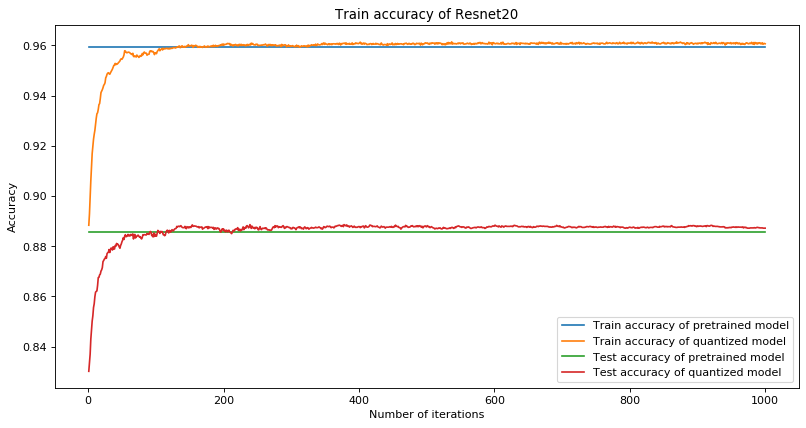

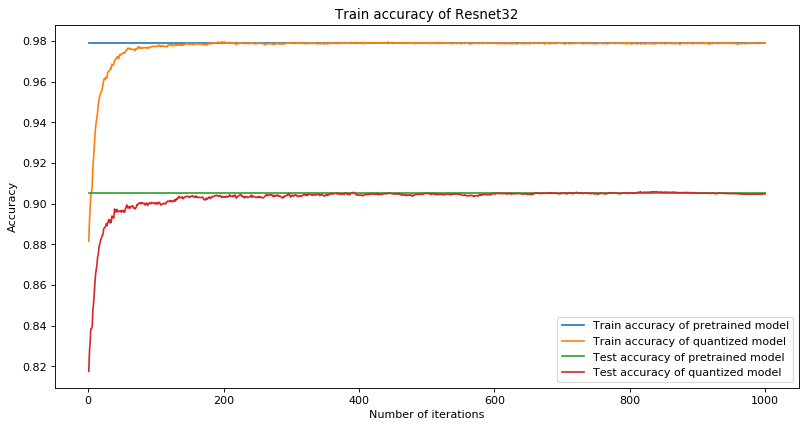

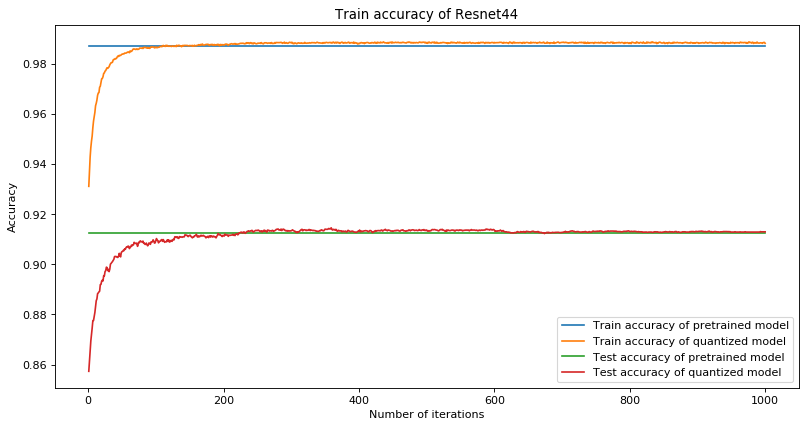

In [43]:
model_names = ["resnet20","resnet32","resnet44"]
for model_name in model_names:
    fp = lambda x:f"/home/aghinsa/Documents/workspace/The_Eye/global/HashedConv/workspace/quant/inference/1000_iters/{x}/"
    train = pd.read_csv(pathlib.Path(fp(model_name)) / "train_acc",sep=" ",names=["time","acc","iter"])
    test = pd.read_csv(pathlib.Path(fp(model_name)) / "test_acc",sep=" ",names=["time","acc","iter"])

    ll = len(train.acc)
    x = np.arange(ll)+1
    acc = train["acc"]

    plt.figure(figsize=(12,6),dpi=80)

    plt.plot(x,[pretrained_accuracy[model_name]['train']]*ll,label = "Train accuracy of pretrained model")
    plt.plot(x,acc,label = "Train accuracy of quantized model")

    acc = test["acc"]
    plt.plot(x,[pretrained_accuracy[model_name]['test']]*ll,label = "Test accuracy of pretrained model")
    plt.plot(x,acc,label = "Test accuracy of quantized model")


    plt.title(f"Train accuracy of {model_name.capitalize()}")
    plt.xlabel("Number of iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.savefig(f"pretrained_vs_quantized_{model_name}")
    plt.show()